In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline
import statistics

**1) описать данные, в том числе полноту;**

In [7]:
df=pd.read_csv('FilmTV_dataset.csv')

In [4]:
df.head()

,filmtv_ID,film_title,year,genre,duration,country,director,actors,avg_vote,votes
0,2,Bugs Bunny's Third Movie: 1001 Rabbit Tales,1982,Animation,76,United States,"David Detiege, Art Davis, Bill Perez",NaN,7.7,28
1,3,18 anni tra una settimana,1991,Drama,98,Italy,Luigi Perelli,"Kim Rossi Stuart, Simona Cavallari, Ennio Fant...",7.0,3
2,17,Ride a Wild Pony,1976,Romantic,91,United States,Don Chaffey,"Michael Craig, John Meillon, Eva Griffith, Gra...",5.6,10
3,18,Diner,1982,Comedy,95,United States,Barry Levinson,"Mickey Rourke, Steve Guttenberg, Ellen Barkin",7.1,14
4,20,A che servono questi quattrini?,1942,Comedy,85,Italy,Esodo Pratelli,"Eduardo De Filippo, Peppino De Filippo, Clelia...",5.9,12


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46907 entries, 0 to 46906
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   filmtv_ID   46907 non-null  int64  
 1   film_title  46907 non-null  object 
 2   year        46907 non-null  int64  
 3   genre       46736 non-null  object 
 4   duration    46907 non-null  int64  
 5   country     46868 non-null  object 
 6   director    46904 non-null  object 
 7   actors      46778 non-null  object 
 8   avg_vote    46907 non-null  float64
 9   votes       46907 non-null  int64  
dtypes: float64(1), int64(4), object(5)
memory usage: 3.6+ MB


**2) рассчитать основные статистические характеристики: медиану, моду,
математическое ожидание, стандартное отклонение, дисперсию, минимум и
максимум, найти выбросы (если есть), размах для колонки duration;**

In [8]:
print('Медиана: ', statistics.median(df['duration']))

Медиана:  95


In [10]:
print('Значение моды: ', statistics.mode(df['duration']))

Значение моды:  90


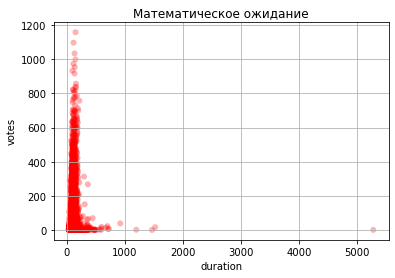

In [64]:
duration = df['duration']
votes = df['votes']
fig, ax = plt.subplots()
ax.scatter(duration, votes, c='red', alpha=0.3, edgecolors='none')

ax.grid(True)
plt.xlabel('duration')
plt.ylabel('votes')
plt.title('Математическое ожидание')
plt.show()

In [14]:
print('Стандартное отклонение: ',statistics.pstdev(df['duration']))

Стандартное отклонение:  34.95860443683266


In [16]:
print('Дисперсия: ',statistics.pvariance(df['duration']))

Дисперсия:  1222.1040241709359


In [17]:
print('Минимум: ',min(df['duration']))

Минимум:  40


In [18]:
print('Максимум: ',max(df['duration']))

Максимум:  5280


**Выбросы**

In [19]:
duration.isnull().sum()

0

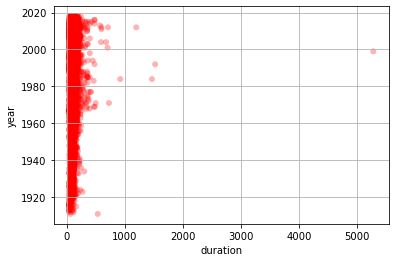

In [20]:
duration = df['duration']
year = df['year']
fig, ax = plt.subplots()
ax.scatter(duration, year, c='red', alpha=0.3, edgecolors='none')

ax.grid(True)
plt.xlabel('duration')
plt.ylabel('year')
plt.show()

In [21]:
duration_range = max(df['duration']) - min(df['duration'])
print('Размах: ',duration_range)

Размах:  5240


**3) построить диаграмму рассеяния и гистограмму признака duration,
сделать предположение о типе распределения;**

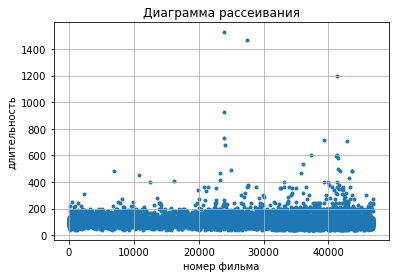

In [22]:
y = df.loc[df['duration'] < 5000, 'duration']

plt.xlabel('номер фильма')
plt.ylabel('длительность')
plt.title('Диаграмма рассеивания')
plt.grid(True)
# вектор от 0 до количество фильмов - 1 (так как мы удалили один фильм в первой строчке)
x = [i for i in range(0, len(duration)-1)]
plt.scatter(x, y, marker='.')
plt.show()

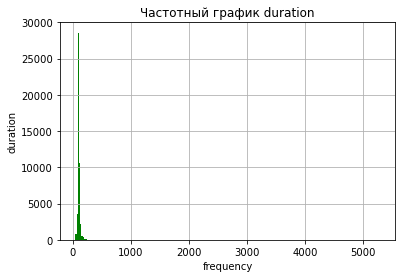

In [45]:
n, bins, patches = plt.hist(duration, 250, facecolor='g')

plt.xlabel('frequency')
plt.ylabel('duration')
plt.title('Частотный график duration')
plt.grid(True)
plt.show()

**4) произвести отсев аномальных значений;**

In [34]:
duration[duration>600]

23844     924
23845    1525
23846     729
24019     680
27462    1470
27639    5280
39271     713
41240    1200
42871     705
Name: duration, dtype: int64

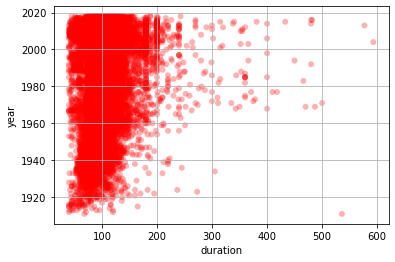

In [35]:
duration_new = duration[duration<600]
year_new = year[duration<600]

fig, ax = plt.subplots()
ax.scatter(duration_new, year_new, c='red', alpha=0.3, edgecolors='none')

ax.grid(True)
plt.xlabel('duration')
plt.ylabel('year')
plt.show()

**5) определить количество отсеянных значений (исходный дата-сет
оставить без изменений);**

In [37]:
print('Количество отсеянных значений',len(duration[duration>600]))

Количество отсеянных значений 9


**6) построить диаграмму рассеяния и гистограмму признака duration
после отсева аномалий, сделать выводы;**

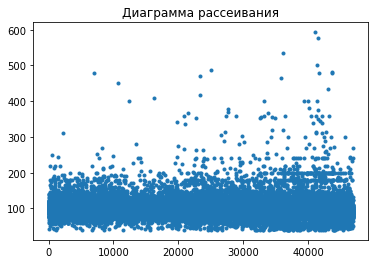

In [42]:
len_column = len(duration_new) # сколько значений в колонке
# генерируем значения от 0 до len_column 
x = np.linspace(0, len_column, len_column)
# выводим все значения из таблицы
plt.title('Диаграмма рассеивания')
plt.scatter(x, duration_new, marker='.')

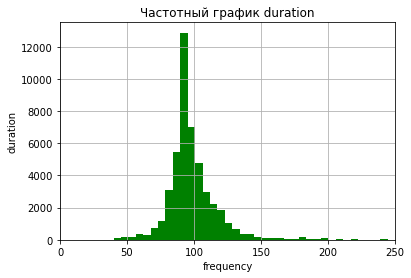

In [48]:
n, bins, patches = plt.hist(duration_new, 100, facecolor='g')
plt.xlim([0, 250])
plt.xlabel('frequency')
plt.ylabel('duration')
plt.title('Частотный график duration')
plt.grid(True)
plt.show()

**7) напишите код для моделирования 10 подбрасываний игрального
кубика. Начертите диаграму histogram. Какое это распределение?**

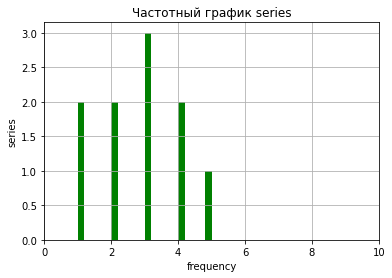

In [98]:
import random
a = []
for i in range(10):
    a.append(random.randint(1, 6))
series = pd.Series(a)
n, bins, patches = plt.hist(series, 20, facecolor='g')
plt.xlabel('frequency')
plt.ylabel('series')
plt.xlim([0, 10])
plt.title('Частотный график series')
plt.grid(True)
plt.show()

**8) смоделируйте 1000 раз сумму по 100 подбрасываний. Начертите
диаграму histogram. Почему график изменился? Почему можно применить
центральную предельную теорему?**

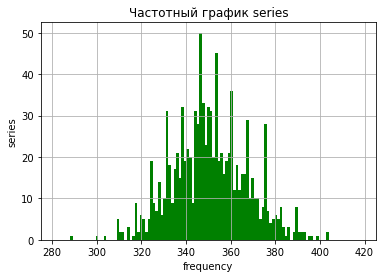

In [108]:
import random
a = []
c=[]
for j in range(1000):
    summ=0
    for i in range(100):
        summ+=random.randint(1, 6)
    c.append(summ)
series = pd.Series(c)
n, bins, patches = plt.hist(series, 100, facecolor='g')
plt.xlim([275, 425])
plt.xlabel('frequency')
plt.ylabel('series')
plt.title('Частотный график series')
plt.grid(True)
plt.show()

Получилось нормальное распределение, что потдверждает центрально-предельную теорему.